In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import os
%cd /content/drive/My Drive/Input Data/Fashion MNIST

/content/drive/My Drive/Input Data/Fashion MNIST


In [0]:
#Loading Data

Train_df = pd.read_csv('fashion-mnist_train.csv') 

Test_df = pd.read_csv('fashion-mnist_test.csv')

In [0]:
#Viewing the data

Train_df.head(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
Test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,37,93,72,58,55,63,66,89,159,120,20,0,0,0,0,1,0,0,0,0,0,0,1,0,0,22,67,125,151,168,...,112,115,117,117,113,146,41,0,3,0,0,0,0,0,0,0,1,0,1,76,54,55,51,53,53,55,53,44,38,37,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,0,0,76,36,110,170,78,136,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,...,94,84,70,44,0,36,152,65,110,0,0,0,0,0,0,0,21,57,89,7,0,0,0,0,0,0,0,0,0,0,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,0,1,3,0,14,152,184,158,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,...,219,223,226,239,247,241,224,213,144,0,0,0,0,0,0,1,0,44,232,199,200,190,180,179,185,189,191,185,179,178,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,131,192,79,0,0,0,0,...,13,26,17,8,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,103,99,102,101,104,119,118,122,130,129,127,166,128,0,0,0,0,0,0,0,0,0,0,0,0,18,211,212,212,225,...,217,206,211,217,219,216,249,222,0,0,0,0,0,0,0,0,0,0,58,94,104,109,113,105,92,53,0,65,152,120,111,95,75,44,1,0,0,0,0,0


In [0]:
Train_df.shape

(60000, 785)

In [0]:
Test_df.shape

(10000, 785)

In [0]:
#Checking for Null Values

Train_df.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [0]:
Test_df.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [0]:
#Creating Training and Testing arrays before creating CNN Model

training = np.array(Train_df, dtype = 'float32')
testing = np.array(Test_df, dtype='float32')

In [0]:
training.shape

(60000, 785)

In [0]:
testing.shape

(10000, 785)

Remember the 10 classes decoding is as follows:

 0 => T-shirt/top
 1 => Trouser
 2 => Pullover
 3 => Dress
 4 => Coat
 5 => Sandal
 6 => Shirt
 7 => Sneaker
 8 => Bag
 9 => Ankle boot

0.0

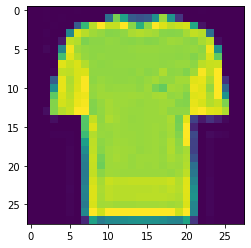

In [0]:
#Comaparing Actual Image with the labels


i = random.randint(1,60000)

plt.imshow(training[i, 1:].reshape((28,28)))

label = training[i,0]
label

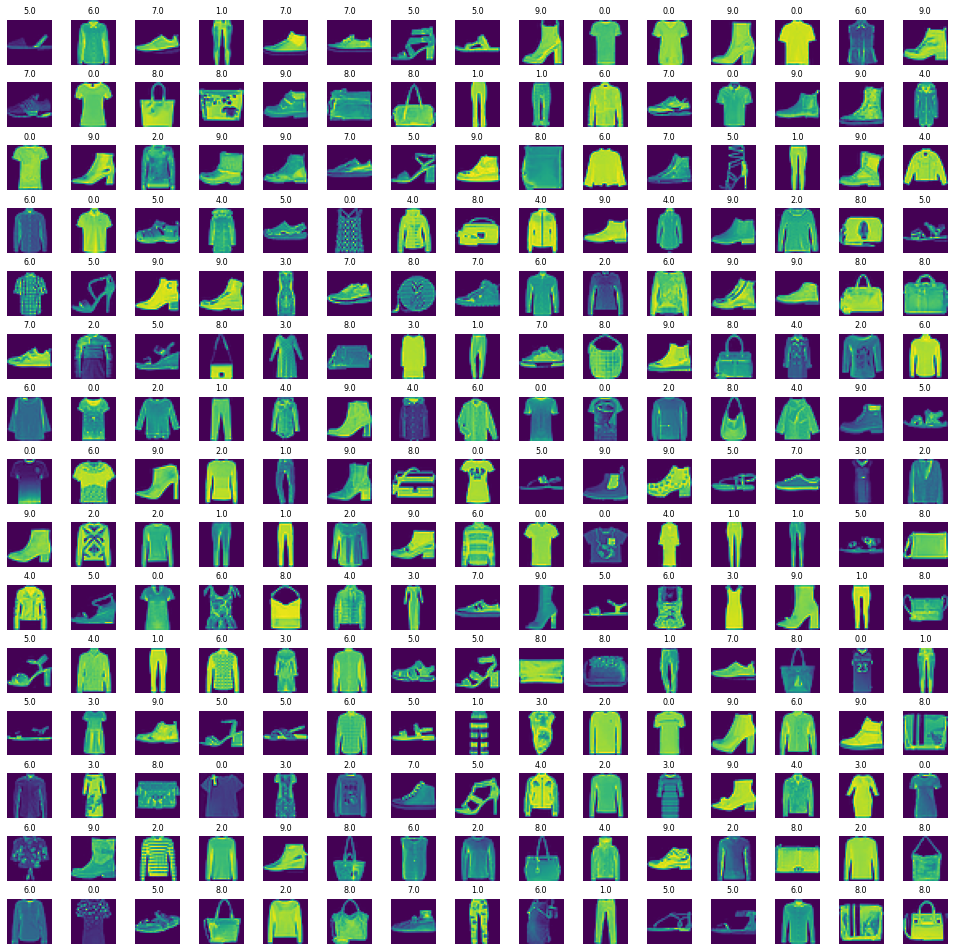

In [0]:
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

There is a need to Normalize the data from 0 - 255 to 0 - 1 which will reduce the illumination's differences.

Moreover the CNN converg faster on [0,1] data than on [0 to 255].

In [0]:
X_Train = training[:,1:]/255
y_Train = training[:,0]/255

X_Test = testing[:,1:]/255
y_Test = testing[:,0]/255

In [0]:
#Splitting the Training Data into Training and Validation.
#Note: Testing is seperate data, while Validation is a part of Training data on which initial testing is performed.


from sklearn.model_selection import train_test_split

X_Train, X_Validate, Y_Train, Y_Validate = train_test_split(X_Train,y_Train, test_size = 0.1, random_state = 12345)

In [0]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)

X_Train = X_Train.reshape(X_Train.shape[0], *(28,28,1))

X_Test = X_Test.reshape(X_Test.shape[0], *(28,28,1))

X_Validate = X_Validate.reshape(X_Validate.shape[0], *(28,28,1))

In [0]:
#Observing the final shapes of Train , Test and Validation Data

X_Test.shape

(10000, 28, 28, 1)

In [0]:
X_Train.shape

(54000, 28, 28, 1)

In [0]:
X_Validate.shape

(6000, 28, 28, 1)

In [0]:
#Importing libraries for the NN

import keras

from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

from keras.optimizers import Adam, RMSprop

from keras.callbacks import TensorBoard, ReduceLROnPlateau



Using TensorFlow backend.


**Architecture**
[2 (Conv Layer* Relu) -->MaxPool --> DropOut] * 2 --> Flattern --> Dense --> DropOut --> Out

In [0]:
cnn_model = Sequential()

In [0]:
cnn_model = Sequential()

# Try 32 fliters first then 64
cnn_model.add(Conv2D(32,(5, 5), input_shape = (28,28,1), activation='relu'))
cnn_model.add(Conv2D(32,(5, 5), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64,(3, 3), activation='relu'))
cnn_model.add(Conv2D(64,(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(activation = 'relu', units=32))
cnn_model.add(Dense(activation = 'softmax', units=10))
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)         

In [0]:
#Using Adam Optimizer

cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [0]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [0]:
#Defining BatchSize and ePochs

epochs = 50
batch_size= 64
history = cnn_model.fit(X_Train,
                        Y_Train,
                        batch_size = batch_size,
                        epochs = epochs,
                        verbose = 2,
                        validation_data = (X_Validate, Y_Validate), callbacks=[learning_rate_reduction])

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
 - 153s - loss: 0.0074 - accuracy: 0.1010 - val_loss: 0.0000e+00 - val_accuracy: 0.0902
Epoch 2/50


KeyboardInterrupt: ignored